In [17]:
!pip install pyAudioAnalysis
!pip install eyed3
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import os
import sys

In [21]:
#Librerias
import eyed3
import pydub
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import MidTermFeatures as mF 
import IPython

import numpy as np
import plotly.graph_objects as go
import plotly
import sklearn
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.formula.api import logit

Cargamos la ruta donde se encuentra nuestras imagenes entiquetadas por el nombre

In [22]:
IEMOCAP = pd.read_csv('iemocap_full_dataset.csv')
IEMOCAP

,session,method,gender,emotion,n_annotators,agreement,path
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
2,1,script,F,xxx,0,0,Session1/sentences/wav/Ses01F_script02_1/Ses01...
3,1,script,F,sur,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
4,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
...,...,...,...,...,...,...,...
10034,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...
10035,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...
10036,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...
10037,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...


Definimos las Rutas en donde vamos a almacenar (se debe para ello crear una estructura de capertas igual al IEMOCAP

In [23]:
IEMOCAP["ruta_drive_Ruido"] = '/content/drive/MyDrive/' +  IEMOCAP["path"]
IEMOCAP["ruta_drive_SinRuidoExtremo"] = '/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo/' +  IEMOCAP["path"]
IEMOCAP["ruta_drive_SinRuidoGeneral"] = '/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral/' +  IEMOCAP["path"]

DataFrame con las rutas y las entiquetas de los audios

In [24]:
IEMOCAP

,session,method,gender,emotion,n_annotators,agreement,path,ruta_drive_Ruido,ruta_drive_SinRuidoExtremo,ruta_drive_SinRuidoGeneral
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,/content/drive/MyDrive/Session1/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,/content/drive/MyDrive/Session1/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
2,1,script,F,xxx,0,0,Session1/sentences/wav/Ses01F_script02_1/Ses01...,/content/drive/MyDrive/Session1/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
3,1,script,F,sur,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,/content/drive/MyDrive/Session1/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
4,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,/content/drive/MyDrive/Session1/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
...,...,...,...,...,...,...,...,...,...,...
10034,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,/content/drive/MyDrive/Session5/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
10035,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,/content/drive/MyDrive/Session5/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
10036,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,/content/drive/MyDrive/Session5/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...
10037,5,impro,F,neu,3,2,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,/content/drive/MyDrive/Session5/sentences/wav/...,/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo...,/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral...


# **LIMPIEZA DE RUIDO**

**Funcion para Quitar ruido del Inicio y Final del Audio**

In [25]:
import soundfile as sf
 
def QuitarRuidoINIFIN (RutaOrig , RutaDest):

  x , sr = librosa.load(RutaOrig)
  clip = librosa.effects. trim(x, top_db= 10)
  sf.write(RutaDest, clip[0], sr)


In [26]:
for n in range(IEMOCAP.shape[0]):
  rutaOrigen = IEMOCAP.ruta_drive_Ruido[n]
  RutaDestino =IEMOCAP.ruta_drive_SinRuidoExtremo[n]
  QuitarRuidoINIFIN(rutaOrigen ,RutaDestino)



**Funcion para quitar ruido general**

In [15]:
import soundfile as sf

def QuitarRuidoGENERAL (RutaOrig , RutaDest):

  x , sr = librosa.load(RutaOrig)
  clip = librosa.effects.split(x, top_db= 10)
  wav_data = []
  for c in clip:

    datos = x[c[0]: c[1]]
    wav_data.extend(datos)

  sf.write(RutaDest, wav_data, sr)


In [ ]:
for n in range(IEMOCAP.shape[0]):
  rutaOrigen = IEMOCAP.ruta_drive_Ruido[n]
  RutaDestino =IEMOCAP.ruta_drive_SinRuidoGeneral[n]
  QuitarRuidoGENERAL(rutaOrigen ,RutaDestino)


# **Prueba de audio**

**Con Ruido**

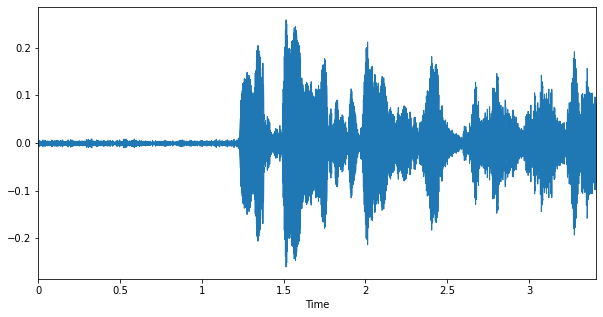

In [ ]:
rutaRuido = "/content/drive/MyDrive/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F004.wav"
x , sr = librosa.load(rutaRuido)
plt.figure(figsize=(10,5))
librosa.display.waveplot(x, sr= sr)

In [ ]:
IPython.display.display(IPython.display.Audio(rutaRuido))

**Sin Ruido General**

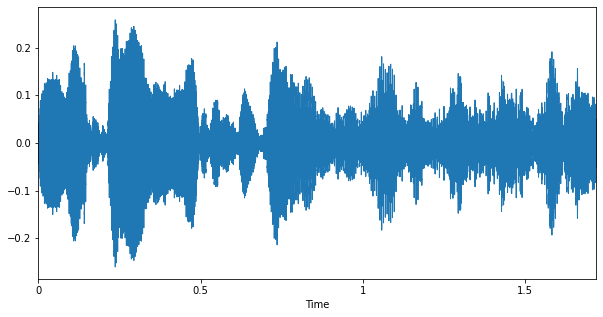

In [ ]:
rutaSinRuidoGeneral = "/content/drive/MyDrive/IEMOCAP_SinRuidoGeneral/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F004.wav"
x , sr = librosa.load(rutaSinRuidoGeneral)
plt.figure(figsize=(10,5))
librosa.display.waveplot(x, sr= sr)

In [ ]:
IPython.display.display(IPython.display.Audio(rutaSinRuidoGeneral))

**Sin ruido en extremos**

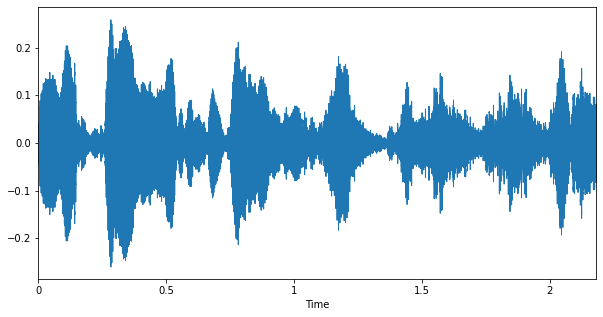

In [ ]:
rutaSinRuidoExtremo = "/content/drive/MyDrive/IEMOCAP_SinRuidoExtremo/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F004.wav"
x , sr = librosa.load(rutaSinRuidoExtremo)
plt.figure(figsize=(10,5))
librosa.display.waveplot(x, sr= sr)

In [ ]:
IPython.display.display(IPython.display.Audio(rutaSinRuidoExtremo))

# **=====================FIN====================================**